In [1]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import dataframe_image as df


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [3]:
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')
county21 = recent_census21.str.split(',').str[0]

county21

C:\Users\yhuan\AppData\Local\Temp/ipykernel_27448/1531365318.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


0               Georgia
1        Appling County
2       Atkinson County
3          Bacon County
4          Baker County
             ...       
155    Whitfield County
156       Wilcox County
157       Wilkes County
158    Wilkinson County
159        Worth County
Name: Unnamed: 0, Length: 160, dtype: object

In [4]:
# 2021 data
data21 = recent_census[['2020','2021']]

census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

census_20

0      10725800
1         18428
2          8301
3         11123
4          2844
         ...   
155      102727
156        8731
157        9556
158        8844
159       20719
Name: 2020, Length: 160, dtype: int64

In [5]:
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

census_21

0      10799566
1         18488
2          8391
3         11079
4          2819
         ...   
155      102848
156        8739
157        9513
158        8831
159       20554
Name: 2021, Length: 160, dtype: int64

In [6]:
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

census21_df= organized_21.set_index("County")

census21_df

,2020,2021
County,,
Georgia,10725800,10799566
Appling County,18428,18488
Atkinson County,8301,8391
Bacon County,11123,11079
Baker County,2844,2819
...,...,...
Whitfield County,102727,102848
Wilcox County,8731,8739
Wilkes County,9556,9513


In [7]:
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# file_2_df
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
file_2_ga

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
398,40,3,5,13,0,Georgia,Georgia,9687653,9688737,9712209,...,3.041427,3.798407,1.747055,4.060100,5.814395,7.200931,5.948622,5.638213,6.502924,4.765012
399,50,3,5,13,1,Georgia,Appling County,18236,18237,18337,...,3.098163,-9.988871,-4.843669,2.931914,-4.662637,-0.813824,-1.626457,4.109774,-8.340780,-2.941657
400,50,3,5,13,3,Georgia,Atkinson County,8375,8380,8363,...,-9.329028,-18.178535,-4.116970,-14.082797,7.737879,-11.188643,-7.009063,6.505632,-16.613495,8.402353
401,50,3,5,13,5,Georgia,Bacon County,11096,11097,11062,...,7.833603,-5.021971,0.089582,0.715820,1.071285,2.400747,-9.077964,-10.313901,-2.342976,-7.590133
402,50,3,5,13,7,Georgia,Baker County,3451,3447,3431,...,-38.267576,11.974255,-8.933889,-18.694407,-27.782065,-1.881763,-3.468390,-25.932448,-16.297262,-24.592888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,50,3,5,13,313,Georgia,Whitfield County,102599,102602,102740,...,-5.533701,-5.965944,-7.713370,-1.963739,-0.193555,1.134970,-7.072937,-4.851221,-1.439719,-7.111897
554,50,3,5,13,315,Georgia,Wilcox County,9255,9251,9313,...,-6.572922,-18.889556,1.324284,-14.569315,12.371823,-17.704073,-7.380493,4.213163,-21.390374,-8.299725
555,50,3,5,13,317,Georgia,Wilkes County,10593,10593,10389,...,-13.676706,-12.202923,-10.187775,4.424111,0.301705,-7.600709,9.859728,3.449500,-4.588559,-0.822073
556,50,3,5,13,319,Georgia,Wilkinson County,9563,9569,9528,...,-14.360382,7.303906,-11.569897,-8.581849,-19.495725,-3.425225,-5.674864,10.246130,-7.914832,-9.240478


In [8]:
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})
ga_census_20 = ga_census_estimate_population.set_index("County")
ga_census_20

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
County,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047
...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769


In [9]:
# merge_census = ga_census_20.merge(census21_df,how ='left', on ='CTYNAME')

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')


column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

# column_names = ["2015","2016","2017","2018","2019","2020","2021"]

merge_census = merge_census_raw.reindex(columns=column_names)

merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [10]:
year_merge = merge_census.keys()

year_merge

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [11]:
# pick x numbers randomly
randomNumbers_merge = []
i = 0
while i < 10:
    
    num_merge = random.randint(1, 159)
    if num_merge not in randomNumbers_merge:
        randomNumbers_merge.append(num_merge)
#         print(randomNumbers2)
        i = i + 1

2010    70560
2011    72642
2012    73114
2013    71830
2014    72667
2015    73137
2016    74660
2017    76046
2018    77332
2019    79718
2020    81378
2021    82442
Name: Bulloch County, dtype: int64
2010    11838
2011    11729
2012    11652
2013    11564
2014    11622
2015    11557
2016    11578
2017    11748
2018    11801
2019    11825
2020    11465
2021    11565
Name: Heard County, dtype: int64
2010    155878
2011    156297
2012    156701
2013    155138
2014    154447
2015    154068
2016    153212
2017    152920
2018    153069
2019    153191
2020    157104
2021    156762
Name: Bibb County, dtype: int64
2010    45638
2011    45778
2012    46029
2013    46139
2014    45880
2015    45486
2016    45471
2017    45501
2018    45467
2019    45569
2020    45866
2021    45812
Name: Colquitt County, dtype: int64
2010    12850
2011    13452
2012    13350
2013    13103
2014    13046
2015    13238
2016    12850
2017    12779
2018    12826
2019    13277
2020    12530
2021    12766
Name: Charlt

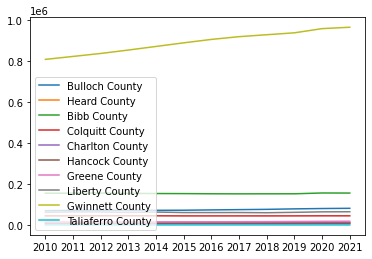

In [12]:
countyDataDictionary_merge = {}
county_names= []

for x in randomNumbers_merge:

    countyDataDictionary_merge[x] = merge_census.iloc[x]        

for x in countyDataDictionary_merge:
    print(countyDataDictionary_merge[x])
    
    county_names.append(countyDataDictionary_merge[x].name)
    plt.plot(year_merge, countyDataDictionary_merge[x])
    
# for col in df:
#     plt.plot(df.index, df[col])
# plt.legend(df.columns)
# plt.show()

county_df = pd.DataFrame({"data":countyDataDictionary_merge})

# print(county_df)

plt.legend(county_names,loc="lower left")
# plt.figure(figsize=(200,40))
# plt.yscale('log')
plt.show()

In [13]:
merge_census

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


Monroe County
Decatur County
Webster County
Stewart County
Spalding County
Brantley County
Cobb County
Coffee County
Turner County
Greene County


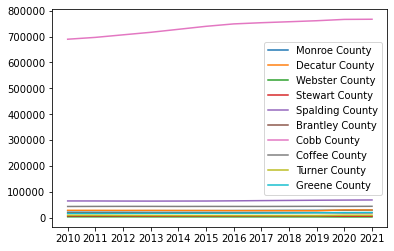

In [14]:
samples_df = merge_census.sample(10)

for row in samples_df.index:
    print(row)
    
    plt.plot(samples_df.loc[row,:])

plt.legend(samples_df.index)
plt.show()

In [15]:
samples_df.T

County,Monroe County,Decatur County,Webster County,Stewart County,Spalding County,Brantley County,Cobb County,Coffee County,Turner County,Greene County
2010,26133,27815,2781,6099,64096,18462,689542,42729,8909,15977
2011,26301,27655,2764,6065,64045,18549,696629,42998,8941,16049
2012,26336,27449,2766,6106,63693,18522,706517,43131,8446,16116
2013,26585,27401,2670,5555,63521,18253,716265,43084,8208,16241
2014,26637,27183,2612,5882,63703,18368,727847,42893,8069,16418
2015,26683,27063,2632,5969,63826,18443,739428,42998,7988,16620
2016,26880,26682,2607,6129,64523,18425,748767,42924,7970,16892
2017,27153,26727,2586,6329,65348,18848,753361,42871,7902,17225
2018,27523,26613,2575,6434,66092,19021,757133,43060,7917,17730
2019,27677,26496,2573,6649,66835,19124,761060,43278,7929,18356


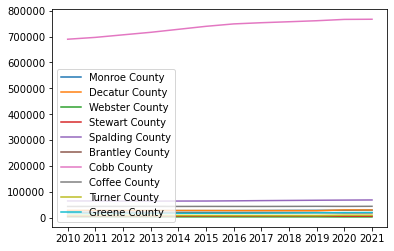

In [16]:
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.show()

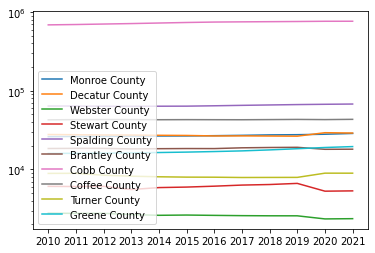

In [17]:
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.yscale('log')
plt.show()

In [18]:
#df.pct_change(axis='columns', periods=-1)
merge_pct_change = merge_census.pct_change(axis='columns', periods =1)
merge_pct_change

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,NaN,0.009413,0.010195,0.007271,0.009585,0.011136,0.012284,0.010534,0.009826,0.010327,0.009200,0.006877
Appling County,NaN,0.006653,-0.004171,-0.000816,0.005553,-0.002653,0.001249,0.000217,0.004933,-0.008038,0.002121,0.003256
Atkinson County,NaN,-0.000478,-0.012561,0.001090,-0.006293,0.014615,-0.004561,-0.004341,0.010537,-0.008988,0.003870,0.010842
Bacon County,NaN,0.007955,0.000179,0.001973,0.000358,0.004205,0.003831,-0.005680,-0.009639,0.000180,0.002253,-0.003956
Baker County,NaN,-0.034975,0.017819,-0.007122,-0.017633,-0.028902,-0.002193,-0.008477,-0.021849,-0.013597,-0.066623,-0.008790
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,NaN,0.001645,0.000165,-0.002283,0.003389,0.005648,0.006688,-0.002186,0.000221,0.001498,-0.014751,0.001178
Wilcox County,NaN,-0.006979,-0.019356,-0.001654,-0.013806,0.009632,-0.020078,-0.006113,0.000456,-0.020150,0.014407,0.000916
Wilkes County,NaN,-0.015305,-0.013392,-0.016051,0.002920,-0.003313,-0.011988,0.006117,-0.002331,-0.007720,-0.021804,-0.004500


In [19]:
merge_dropped=merge_pct_change.drop(columns= ['2010'])

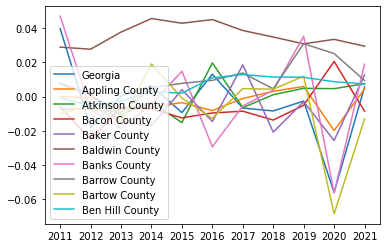

In [20]:
plt.plot(merge_dropped.sample(10).T);
plt.legend(merge_dropped.index,loc="lower left")
# plt.yscale('log')
# plt.figure(figsize=(200,40))
plt.show()

In [21]:
merge_census


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10725800,10799566
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18428,18488
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8301,8391
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11123,11079
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2844,2819
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,102727,102848
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8731,8739
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9556,9513


In [35]:
sample_counties = merge_census.sample(10)

sample_counties

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Paulding County,142826,143606,144750,146775,148562,151691,155415,159642,164482,169302,169660,173780
Worth County,21692,21516,21356,21058,21010,20692,20732,20532,20307,20185,20719,20554
Grady County,25027,25103,25283,25120,25236,25106,24895,24762,24730,24588,26221,25918
Laurens County,48388,47841,47819,47727,47553,47491,47287,47362,47293,47567,49497,49547
Barrow County,69670,69835,70128,71233,72843,74979,77108,79086,81105,83581,83963,86658
Newton County,100128,100446,100965,102060,103470,104920,106529,107903,109556,111894,112780,115355
Pike County,17929,17792,17780,17784,17774,17935,17916,18213,18622,18953,18935,19477
Chatham County,265799,271665,276243,277790,282396,286239,289055,289771,289771,290185,294904,296329
Fulton County,925622,947582,973464,981844,992321,1005752,1023816,1039996,1051516,1065019,1069023,1065334


In [115]:
sample_counties.dfi.export('plots_tables/sample_counties.png')

In [116]:
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

clean_samp_change = samp_change.drop(columns= ['2010'])
clean_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Paulding County,0.005461,0.007966,0.013990,0.012175,0.021062,0.024550,0.027198,0.030318,0.029304,0.002115,0.024284
Worth County,-0.008114,-0.007436,-0.013954,-0.002279,-0.015136,0.001933,-0.009647,-0.010959,-0.006008,0.026455,-0.007964
Grady County,0.003037,0.007170,-0.006447,0.004618,-0.005151,-0.008404,-0.005342,-0.001292,-0.005742,0.066415,-0.011556
Laurens County,-0.011304,-0.000460,-0.001924,-0.003646,-0.001304,-0.004296,0.001586,-0.001457,0.005794,0.040574,0.001010
Barrow County,0.002368,0.004196,0.015757,0.022602,0.029323,0.028395,0.025652,0.025529,0.030528,0.004570,0.032097
Newton County,0.003176,0.005167,0.010845,0.013815,0.014014,0.015335,0.012898,0.015319,0.021341,0.007918,0.022832
Pike County,-0.007641,-0.000674,0.000225,-0.000562,0.009058,-0.001059,0.016577,0.022456,0.017775,-0.000950,0.028624
Chatham County,0.022069,0.016852,0.005600,0.016581,0.013609,0.009838,0.002477,0.000000,0.001429,0.016262,0.004832
Fulton County,0.023725,0.027314,0.008608,0.010671,0.013535,0.017961,0.015804,0.011077,0.012841,0.003760,-0.003451


In [117]:
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

clean_samp_change = samp_change.drop(columns= ['2010'])

per_samp_change= clean_samp_change*100

per_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Paulding County,0.546119,0.796624,1.398964,1.217510,2.106191,2.454991,2.719815,3.031784,2.930412,0.211456,2.428386
Worth County,-0.811359,-0.743633,-1.395392,-0.227942,-1.513565,0.193311,-0.964692,-1.095850,-0.600778,2.645529,-0.796370
Grady County,0.303672,0.717046,-0.644702,0.461783,-0.515137,-0.840437,-0.534244,-0.129230,-0.574201,6.641451,-1.155562
Laurens County,-1.130446,-0.045986,-0.192392,-0.364574,-0.130381,-0.429555,0.158606,-0.145686,0.579367,4.057435,0.101016
Barrow County,0.236831,0.419560,1.575690,2.260188,2.932334,2.839462,2.565233,2.552917,3.052833,0.457042,3.209747
Newton County,0.317593,0.516696,1.084534,1.381540,1.401372,1.533549,1.289790,1.531931,2.134068,0.791821,2.283206
Pike County,-0.764125,-0.067446,0.022497,-0.056230,0.905817,-0.105938,1.657736,2.245649,1.777468,-0.094972,2.862424
Chatham County,2.206931,1.685164,0.560014,1.658087,1.360855,0.983793,0.247704,0.000000,0.142871,1.626204,0.483208
Fulton County,2.372459,2.731373,0.860843,1.067074,1.353493,1.796069,1.580362,1.107697,1.284146,0.375956,-0.345081


In [118]:
per_samp_change.dfi.export('plots_tables/per_samp_change.png')

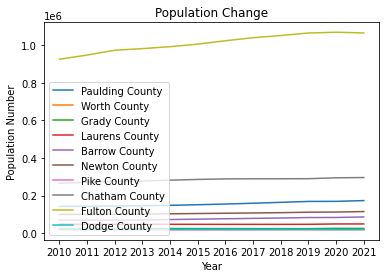

In [122]:
plt.plot(sample_counties.T);
plt.legend(sample_counties.index,loc="lower left")

#labeling
plt.title("Population Change")
plt.xlabel("Year")
plt.ylabel("Population Number")

plt.savefig('plots_tables/sample_counties_plot.png')
plt.show()

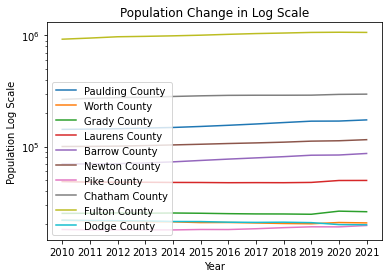

In [123]:
plt.plot(sample_counties.T);
plt.legend(sample_counties.index,loc="lower left")

#labeling
plt.title("Population Change in Log Scale")
plt.xlabel("Year")
plt.ylabel("Population Log Scale")

plt.savefig('plots_tables/sample_counties_plot_logscale.png')
plt.yscale('log')
plt.show()


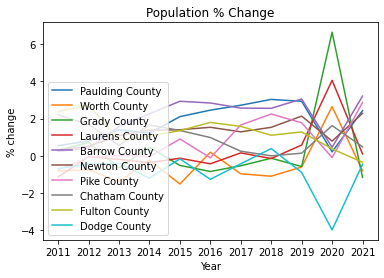

In [121]:
plt.plot(per_samp_change.T);
plt.legend(per_samp_change.index,loc="lower left")

#labeling
plt.title("Population % Change")
plt.xlabel("Year")
plt.ylabel("% change")
plt.savefig('plots_tables/per_samp_change_plot.png')
plt.show()